<a href="https://colab.research.google.com/github/SeoyoungOhMe/skt-fly-ai-challenger-class/blob/master/01_nn_linearregression_autompg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 뉴럴네트워크 다중 선형회귀
- auto-mpg dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
tf.__version__

'2.14.0'

In [3]:
!pip install tensorflow==2.14

### 1.데이터 준비

In [4]:
!wget https://raw.githubusercontent.com/devdio/datasets/main/auto-mpg.csv

--2023-12-29 04:47:36--  https://raw.githubusercontent.com/devdio/datasets/main/auto-mpg.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18131 (18K) [text/plain]
Saving to: ‘auto-mpg.csv’

auto-mpg.csv        100%[===================>]  17.71K  --.-KB/s    in 0.004s  

2023-12-29 04:47:36 (3.88 MB/s) - ‘auto-mpg.csv’ saved [18131/18131]



In [14]:
mpg = pd.read_csv('auto-mpg.csv', na_values=['?', '-']) # horsepower의 이상한 값을 없애줌.
mpg.shape

(398, 9)

In [15]:
df = mpg.copy()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [20]:
df.columns = [ s.replace(' ', '_') for s in df.columns ]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [22]:
df['horsepower'].unique() # 중간에 이상한 값('?') 때문에 horsepower가 object 타입으로 변환됨.

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [24]:
df.isna().sum(axis=0)

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

### 2.테스트데이터

In [25]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')

In [27]:
X = df.drop(['mpg', 'origin', 'car_name'], axis=1)
y = df['mpg']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((318, 6), (80, 6), (318,), (80,))

### 3.전처리

- 결측치 삭제

In [29]:
X_train = X_train.dropna()
y_train = y_train[X_train.index]

X_train.shape, y_train.shape

((313, 6), (313,))

- 스케일링

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)

X_train_s

array([[ 1.51040727,  1.07508267,  1.25238452,  0.54139086, -1.30971783,
        -1.69540513],
       [-0.86227768, -0.93225674, -0.40975295, -1.00783493, -0.40324852,
        -1.69540513],
       [-0.86227768, -0.99044049, -0.94592632, -1.13267661,  0.93832606,
         1.6614434 ],
       ...,
       [-0.86227768, -0.57345694, -0.22209226, -0.55008211, -0.2944722 ,
         0.54249389],
       [-0.86227768, -1.00983508, -1.10677834, -1.1029524 ,  0.61199711,
         1.38170602],
       [-0.86227768, -0.93225674, -1.53571704, -1.22184924,  1.95357168,
        -0.85619299]])

In [31]:
y_train = y_train.values

### 4.모델만들기

In [54]:
from tensorflow import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(units=6, activation='relu', input_shape=(6,)),
    layers.Dense(units=3, activation='relu'),
    layers.Dense(units=1),
])

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 42        
                                                                 
 dense_4 (Dense)             (None, 3)                 21        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 67 (268.00 Byte)
Trainable params: 67 (268.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- 모델 컴파일
  - 손실함수를 결정
  - 옵티마이저(어떤 경사 하강법을 쓸건지)
  - 매트릭스 (MAE, MSE)

In [56]:
model.compile(
    loss='mse',
    optimizer='adam',
    metrics=['mse', 'mae']
)

- 학습

In [57]:
EPOCHS = 80
BATCH_SIZE = 16

history = model.fit(
    X_train_s, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1
)

Epoch 1/80
20/20 [==============================] - 1s 3ms/step - loss: 597.1262 - mse: 597.1262 - mae: 22.8937
Epoch 2/80
20/20 [==============================] - 0s 3ms/step - loss: 590.7014 - mse: 590.7014 - mae: 22.6942
Epoch 3/80
20/20 [==============================] - 0s 4ms/step - loss: 583.6273 - mse: 583.6273 - mae: 22.4619
Epoch 4/80
20/20 [==============================] - 0s 4ms/step - loss: 575.6138 - mse: 575.6138 - mae: 22.1870
Epoch 5/80
20/20 [==============================] - 0s 5ms/step - loss: 566.9036 - mse: 566.9036 - mae: 21.8862
Epoch 6/80
20/20 [==============================] - 0s 5ms/step - loss: 557.3539 - mse: 557.3539 - mae: 21.5400
Epoch 7/80
20/20 [==============================] - 0s 4ms/step - loss: 547.1492 - mse: 547.1492 - mae: 21.1534
Epoch 8/80
20/20 [==============================] - 0s 5ms/step - loss: 536.6078 - mse: 536.6078 - mae: 20.7405
Epoch 9/80
20/20 [==============================] - 0s 4ms/step - loss: 526.0678 - mse: 526.0678 - mae: 

### 5.평가

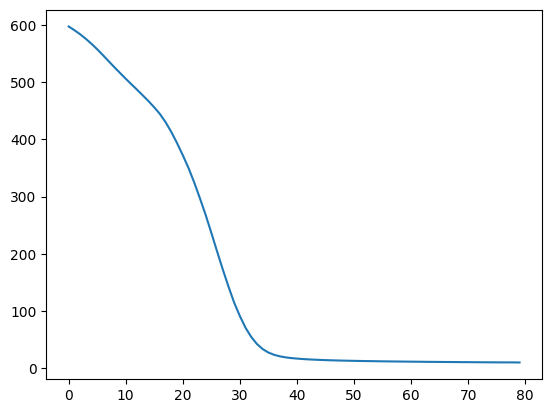

In [58]:
hist = history.history
epoch = history.epoch

plt.plot(epoch, hist['loss'], label='loss')
plt.show()

### 6.평가
- 테스트데이터 전처리

In [59]:
X_test.isna().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
dtype: int64

In [60]:
X_test = X_test.dropna()
y_test = y_test[X_test.index]

X_test.shape, y_test.shape

((79, 6), (79,))

In [61]:
X_test_s = scaler.transform(X_test)

In [62]:
y_pred = model.predict(X_test_s)

3/3 [==============================] - 0s 4ms/step


In [63]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

8.386015382784594

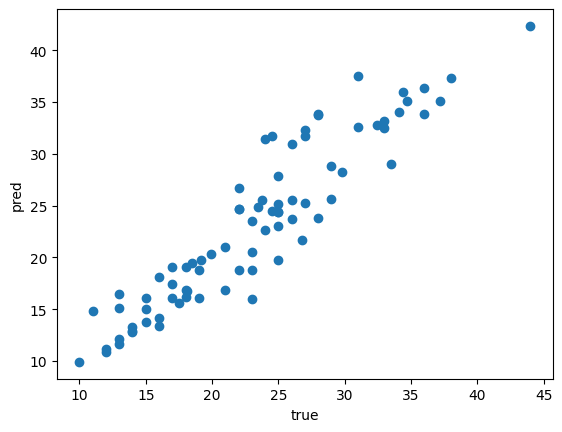

In [64]:
plt.scatter(y_test, y_pred)
plt.xlabel('true')
plt.ylabel('pred')
plt.show()

### END